In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [12]:
# загружаем данные
phones = pd.read_csv("data/1.8_phones.csv")

In [7]:
# Заменяем поле 'os' числовым аналогом
phones['os_d'] = 0
phones['os_d'][phones['os']=='Android'] = 1
phones['os_d'] = phones['os_d'].astype('int')

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
phones.head(7)

,disk,os,price,year,os_d
0,64,Android,7256,2016,1
1,128,Android,7623,2015,1
2,64,Android,1916,2010,1
3,512,iOS,15045,2017,0
4,16,Android,4478,2013,1
5,512,iOS,15842,2018,0
6,128,Android,7191,2015,1


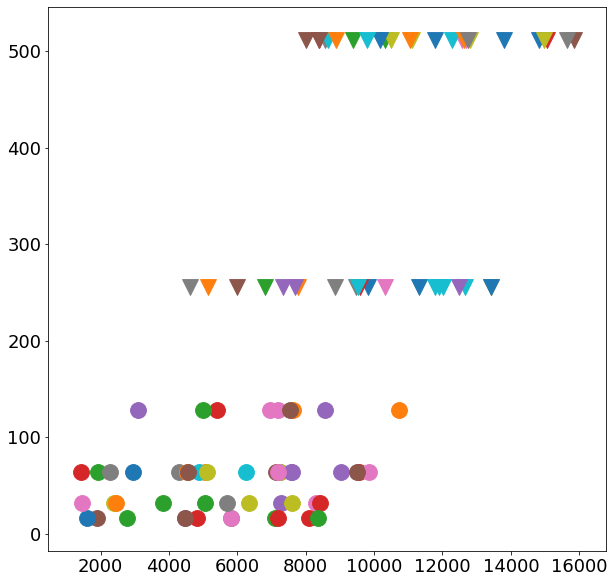

In [9]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [10]:
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [11]:
# выгружаем признаки в отдельную переменную
X = phones[["price", "disk"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=2).fit(X)

In [12]:
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_

In [13]:
clust.cluster_centers_

array([[11529.70731707,   371.51219512],
       [ 5736.18644068,   110.10169492]])

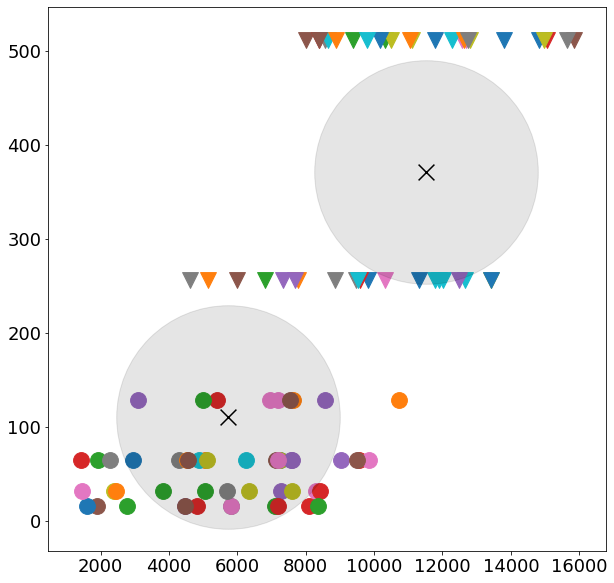

In [14]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.price, phones.disk, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 2e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 2e2, c="black", alpha=0.1)

# plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
# plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()